# Aula 3 - Regressão Logística

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão logística
- 4) Métricas de performance para problemas de classificação

____
____
____

## 1) Introdução

**Problemas de Classificação** são aqueles em que queremos determinar a que **CATEGORIA** dentro de um **CONJUNTO DE CATEGORIAS** uma dada observação pertence, com base em suas features.

Para isso, construímos um **CLASSIFICADOR**: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas)


Principal diferença entre problemas de regressão e classificação:
- Regressão: valores contínuos;
- Classificação: valores (classes) discretas (binárias ou não).

<img src="https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1" width=700>


<img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300>

Exemplos de problemas de classificação:
- Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    - Features: palavras contidas no corpo do e-mail; remetente; assunto;
- Detecção de doenças: que codição médica a pessoa tem?
    - Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
- Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    - Features: palavras no corpo do texto; título;
- Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    - Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
- Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    - Features: histórico de pagamento; score de crédito;
    
    
<img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500>



Veremos hoje um dos mais simples e poderosos classificadores: a **Regressão Logística!**


___
___
___

## 2) Regressão Logística

A [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (também chamado de **logit**), apesar do nome, é um método utilizado para classificação!

- Classificação binária: duas classes (0 e 1);
- Classificação multiclasse: n classes (0, 1, ..., n-1), com $n \in \mathbb{N}$

O objetivo da regressão logística é: **modelar a PROBABILIDADE $P(x)$ de dada observação (com features $x$) pertencer à classe 1**, ou seja, queremos encontrar um modelo que nos dê:

$$ P( x \in 1 | x) $$

Naturalmente, $0 \le P(x) \le 1$. Assim, por exemplo, se:
- $P(x) \ge 0,5$: x pertence à classe 1
- $P(x) < 0.5$: x pertence à classe 0

Obs.: este valor de 0.5 (50%) é chamado de "cutoff", e pode ser ajustado, embora seja comum fixá-lo em 50%!

Poderíamos pensar em utilizar a regressão linear em nossos problemas de classificação, mas isso não é uma boa ideia: acabamos encontrando probabilidades negativas e fit ruim!

No exemplo a seguir, temos a probabilidade de não-pagamento (default) de um empréstimo com base em uma feature (balanço). Note probabilidades negativas!

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/70189f79-2886-4e59-893b-1dac9dd64078.png" height="400" width="400">
    <figcaption>
        Regressão Linear para classificação. Fonte: 
        <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/">ISLR</a>
    </figcaption>
</figure> 

Para resolver este problema, podemos adaptar a função de regressão linear para uma função que tem imagem entre 0 e 1. Seria legal se tivéssemos algo como:

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/6d54529a-d295-47a3-8a11-1f426fde7229.png" height="400" width="400">
    <figcaption>
        Classificador. Fonte: 
        <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/">ISLR</a>
    </figcaption>
</figure> 

Um exemplo de tal função é a FUNÇÃO LOGÍSTICA ou FUNÇÃO SIGMOIDAL:

<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width=400>

Note que:
- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

Para incorporar a ideia da regressão linear na regressão logística, tomamos:

- $z = \beta_0 + \beta_1x$, que é o modelo de regressão linear (uma variável);

E substituímos na função logística:

- $\phi(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$

Com isso, tomamos qualquer output real do modelo linear e transformamos em um valor entre 0 e 1, como queríamos!

<img src="http://juangabrielgomila.com/wp-content/uploads/2015/04/LogReg_1.png" width="500">

No nosso caso, como queremos modelar probabilidades, tomamos, no caso de uma feature:

$P(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$

Ou, para a regressão logística múltipla com $p$ features:

$P(x_1, \cdots, x_p) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}}$

Com um pouco de álgebra, é possível mostrar que: 

$ \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p = \log \left ( \frac{P}{1-P} \right ) $

A quantidade $\frac{P}{1-P}$ é conhecida como **odds/chance**; e $\log \left ( \frac{P}{1-P} \right )$ é o [log-odds ou logit](https://en.wikipedia.org/wiki/Logit).

Note, portanto, que podemos entender a regressão logística como um modelo em que **o logit é linear com as features**. Portanto, de fato, a regressão logística é **um modelo linear**.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_z(x, b0, b1):
    
    return b0 + b1*x

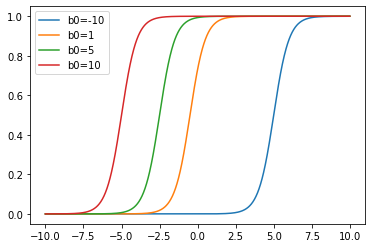

In [3]:
x = np.linspace(-10, 10, 1000)

b0_list = [-10, 1, 5, 10]
b1 = 2

for b0 in b0_list:
    
    z = b0 + b1*x

    y = 1/(1 + np.exp(-z))

    plt.plot(x, y, label=f'b0={b0}')
    
    plt.legend()
             

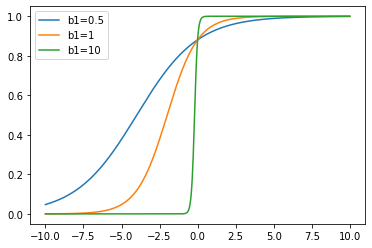

In [4]:
b1_list = [0.5, 1, 10]
b0 = 2

for b1 in b1_list:
    
    z = b0 + b1*x

    y = 1/(1 + np.exp(-z))

    plt.plot(x, y, label=f'b1={b1}')
    
    plt.legend()

___

### Função de perda e algoritmo de aprendizagem

A função de perda para a regressão logística é a famosa [binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a), também conhecida como [log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)

Esta função será de enorme importância no estudo de **redes neurais**.

As principais implementações do algoritmo de aprendizagem da regressão logística se baseia no [método de máxima verossimilhança](https://pt.wikipedia.org/wiki/M%C3%A1xima_verossimilhan%C3%A7a). 

Para maiores detalhes sobre o algoritmo de aprendizagem, veja [este vídeo](https://youtu.be/yIYKR4sgzI8) e [esta série de vídeos](https://youtu.be/vN5cNN2-HWE), do ótimo canal StatQuest!


_________

__________________

Para introduzirmos as ideias, utilizaremos um dataset de marketing (propagandas/advertising), que está disponível no <a href="https://www.kaggle.com/fayomi/advertising">Kaggle</a>. Este é um dataset artificial e didático, com os dados bem separáveis, o que é ótimo para ilustração!<br>

Visite o Kaggle e procure por "advertising" para datasets relacionados reais e ainda mais interessantes

A base que utilizaremos contém as seguintes colunas:

* 'Daily Time Spent on Site': tempo que o cliente ficou no site (em minutos);
* 'Age': idade do cliente (em anos);
* 'Area Income': média salarial (por ano) da região geográfica do cliente;
* 'Daily Internet Usage': tempo médio (em minutos) que o cliente fica na internet;
* 'Ad Topic Line': título do anúncio;
* 'City': cidade do cliente;
* 'Male': dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* 'Country': país do cliente;
* 'Timestamp': marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* 'Clicked on Ad': dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Nosso objetivo é criar um modelo que possa prever se um determinado usuário clickará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Tomamos como variáveis independentes (preditores/features) as primeiras 9 colunas, enquanto nossa variável dependente (target) é a última coluna ("Clicked on Ad").

Ou seja, nosso modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features clickará no anúncio ou não. 

__IMPORTANTE!__

Pense no problema de negócio que estamos querendo resolver com nosso modelo -- direcionamento de marketing! Temos os dados dos nossos clientes (customer-centric), nós os conhecemos! Não podemos utilizar essa informação a nosso favor?

Talvez não faça sentido exibir o anúncio para um usuário que tem baixa probabilidade de clickar no ad, não é mesmo? 

Por outro lado, é muito mais eficiente direcionar nosso marketing aos clientes com alta chance de clickar no nosso anúncio!

Assim, economizamos dinheiro (todo anúncio é pago!), e ganhamos em eficiência e alcance!

___
___
___

In [5]:
# importe as principais bibliotecas
import numpy as np 
import pandas as pd
import seaborn as sns

O código abaixo é apenas para formatar os números em até 3 casas decimais. 

Fica aqui pra conhecimento e também pq vai nos auxiliar a ver melhor as probabilidades no final.

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, precision=3)

In [7]:
# leia os dados em '../datasets/advertising.csv'

df = pd.read_csv('../datasets/advertising.csv')

In [8]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970,30,71384.570,208.580,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.300,45,67782.170,134.420,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.630,51,42415.720,120.370,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.550,19,41920.790,187.950,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [9]:
# de uma olhada nas 5 primeiras linhas

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
# dê uma olhada no info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
# olhe as estatísticas básicas

df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,65.000,36.009,55000.000,180.000,0.481,0.500
std,15.854,8.786,13414.634,43.902,0.500,0.500
min,32.600,19.000,13996.500,104.780,0.000,0.000
25%,51.360,29.000,47031.802,138.830,0.000,0.000
50%,68.215,35.000,57012.300,183.130,0.000,0.500
75%,78.547,42.000,65470.635,218.793,1.000,1.000
max,91.430,61.000,79484.800,269.960,1.000,1.000


Alguma observação notável?

In [12]:
# dê uma olhada na distribuição do target

df["Clicked on Ad"].value_counts(normalize=True)

1   0.500
0   0.500
Name: Clicked on Ad, dtype: float64

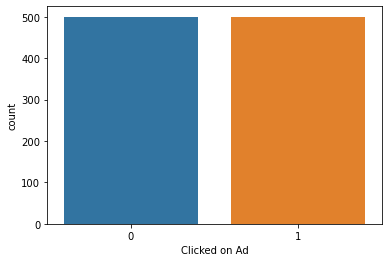

In [13]:
sns.countplot(data = df, x = "Clicked on Ad")

Temos um dataset balanceado no target, o que __bem raro na vida real!__

Um dataset desbalanceado pode causar sérios problemas de performance ao modelo! Há várias técnicas para lidar com tal problema, mas, neste primeiro exemplo, não nos preocuparemos com isso...

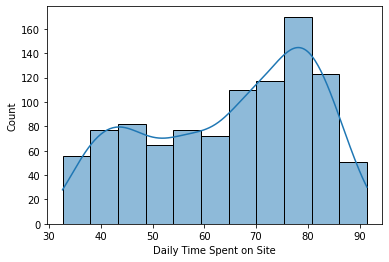

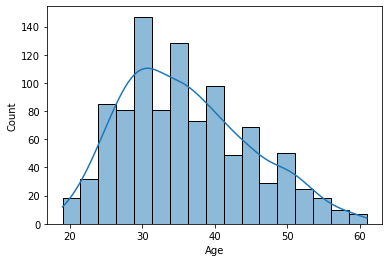

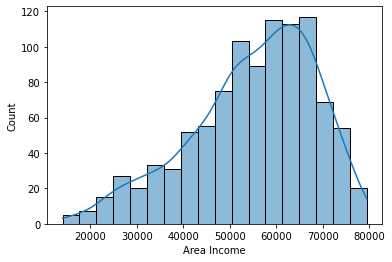

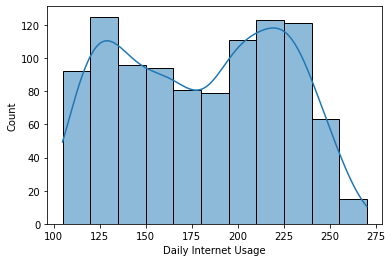

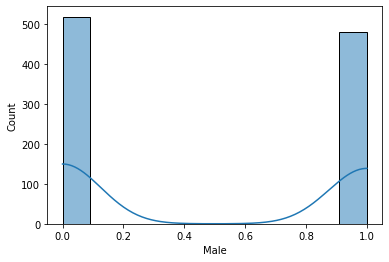

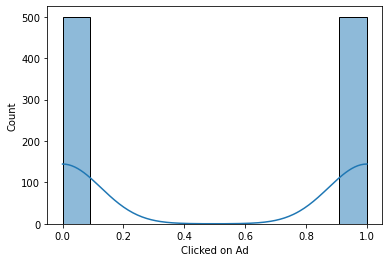

In [14]:
# dê uma olhada na distribuição das variáveis numéricas
# lembre do df.select_dtypes(include=[np.number])

for col in df.select_dtypes(include=[np.number]).columns:
    
    sns.histplot(data=df, x=col, kde=True)
    
    plt.show()

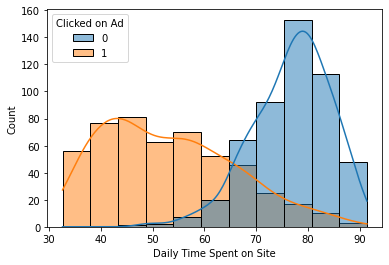

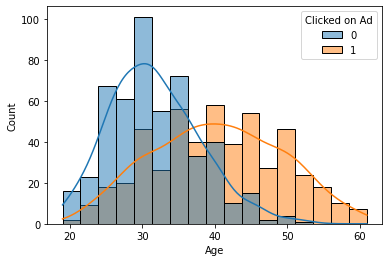

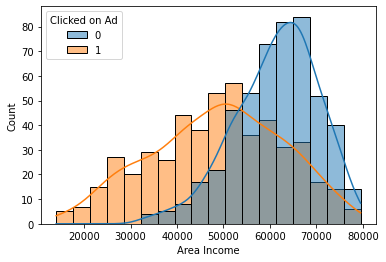

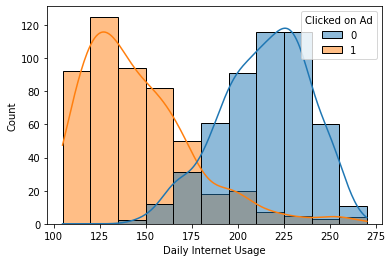

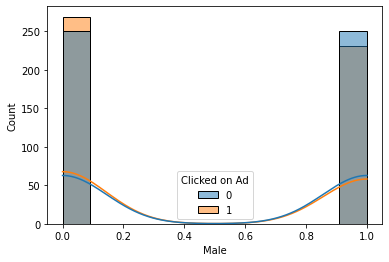

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


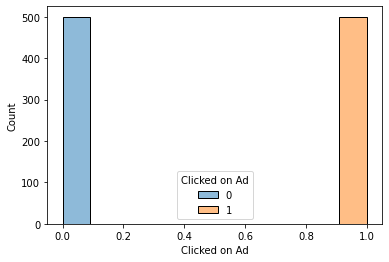

In [15]:
# faça um pairplot usando o hue como target -- isso é sempre uma boa prática em problemas de classificação!

for col in df.select_dtypes(include=[np.number]).columns:
    
    sns.histplot(data=df, x=col, kde=True, hue="Clicked on Ad")
    
    plt.show()

Como tínhamos comentado no início, nossos dados são muito bem separáveis!

Isto favorece bastante a performance do nosso modelo. Mas, lembre-se, é bem raro encontrar casos assim na vida real! (É aí que devemos partir para métodos mais avançados, como SVM, árvores, etc.)

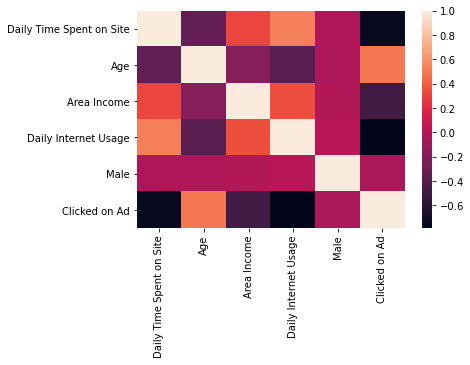

In [16]:
sns.heatmap(df.corr())

Vamos começar a construir o modelo?

In [17]:
# crie as variáveis X e y, com as features e o target
# utilize todas as features numéricas - dica: df.select_dtypes(include=[np.number])

df = df.select_dtypes(include=np.number)

In [18]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.950,35,61833.900,256.090,0,0
1,80.230,31,68441.850,193.770,1,0
2,69.470,26,59785.940,236.500,0,0
3,74.150,29,54806.180,245.890,1,0
4,68.370,35,73889.990,225.580,0,0
...,...,...,...,...,...,...
995,72.970,30,71384.570,208.580,1,1
996,51.300,45,67782.170,134.420,1,1
997,51.630,51,42415.720,120.370,1,1
998,55.550,19,41920.790,187.950,0,0


In [19]:
X = df.drop(columns="Clicked on Ad")
y = df["Clicked on Ad"]

In [20]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.950,35,61833.900,256.090,0
1,80.230,31,68441.850,193.770,1
2,69.470,26,59785.940,236.500,0
3,74.150,29,54806.180,245.890,1
4,68.370,35,73889.990,225.580,0
...,...,...,...,...,...
995,72.970,30,71384.570,208.580,1
996,51.300,45,67782.170,134.420,1
997,51.630,51,42415.720,120.370,1
998,55.550,19,41920.790,187.950,0


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [22]:
# 1) Importe a classe do estimador que se deseja treinar

from sklearn.linear_model import LogisticRegression

In [23]:
# 2) Instancie a classe do estimador, escolhendo os hiperparâmetros desejados (não há muitos)

logit = LogisticRegression()

In [24]:
# 3) Separe os dados em dados de treino e dados de teste
# dica: procure pelo "train_test_split"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [25]:
# 4) Treine o modelo, usando os dados de treino. 

modelo = logit.fit(X_train, y_train)

__Modelo treinado!__

Vamos ver os coeficientes do modelo:

In [26]:
# capture e exiba o intercept e os demais coeficientes

modelo.intercept_

array([0.005])

In [27]:
modelo.coef_

array([[-0.056,  0.266, -0.   , -0.027,  0.002]])

In [28]:
modelo.coef_[0][2]

-1.6215339620260384e-05

In [29]:
X.columns.tolist()

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male']

Lembre-se que, diferentemente da regressão linear, devido ao fato da função logística ser uma exponencial, a variação de $P(x)$ depende de x, e não apenas dos coeficientes! Então, a interpretação dos coeficientes não é tão imediata. 

Mas, os sinais carregam significado. Para um coeficiente:
- positivo ($\beta_i > 0$), temos que um aumento em x levará a um aumento de $P(x)$;
- negativo ($\beta_i < 0$), temos que um aumento em x levará a uma diminuição de $P(x)$

Mas, a variacão de $P(x)$ em si, depende do valor de x!

__Agora que o modelo está treinado, vamos avaliá-lo!__

______
_____
_____
____

## 3) Métricas de performance para problemas de classificação

Após treinar o modelo, como podemos avaliar sua performance?

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400">

No Sklearn, a notação muda um pouco:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Um jeito fácil de lembrar os tipos de erros:


<img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="400" width="400">


Além disso, temos as seguintes métricas numéricas de avaliação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo;

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- F1-Score: média harmônica de precision e recall.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=300>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, a métrica a ser otimizada é o F1! 


<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" height="400" width="400">

Adiante, veremos como calcular a matriz de confusão e as métricas acima para problemas de classificação!

In [33]:
p = 0.9
r = 0.2

print((p + r)/2)
print(2/(1/p + 1/r))

0.55
0.32727272727272727


_______

In [36]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
521,63.260,29,54787.370,120.460,1
737,71.230,52,41521.280,122.590,0
740,43.630,38,61757.120,135.250,1
660,42.040,49,67323.000,182.110,0
411,78.680,29,66225.720,208.050,0
...,...,...,...,...,...
468,65.590,47,28265.810,121.810,0
935,83.980,36,68305.910,194.620,0
428,60.530,29,56759.480,123.280,0
7,66.000,48,24593.330,131.760,1


In [37]:
# 5) Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = modelo.predict(X_test)

In [38]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [40]:
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

Como vimos no passo 2, em problemas de classificação é muito comum utilizarmos a **matriz de confusão** e as **métricas de classificação** para avaliar nossos modelos.

Dado isso, o sklearn já disponibilica estas funcionalidades:

In [47]:
# 6) Avalie a performance do modelo com base nas previsões acima

from sklearn.metrics import confusion_matrix

m  = confusion_matrix(y_test, y_pred)

print(m)

[[140   6]
 [ 25 129]]


In [54]:
tn, fp = m[0, 0], m[0, 1]

fn, tp = m[1, 0], m[1, 1]

In [57]:
fn

25

In [55]:
p = tp/(tp + fp)

r = tp/(tp + fn)

In [56]:
p, r

(0.9555555555555556, 0.8376623376623377)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



Conforme esperado, nosso modelo está muito bom! Um f1-score tão alto na vida real é algo notável!

Isso se deve à grande separabilidade dos nossos dados!

Além dos coeficientes do modelo, algo muito interessante que a classe do sklearn tem é o método `predict_proba()`

Esse método retorna exatamente qual é a probabilidade modelada pelo logit.

Isso pode ser muito útil, pois assim conseguimos **mudar qual é o threshold de esclha de classe** para ser algo diferente de 0.5!


In [59]:
modelo.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [60]:
modelo.classes_

array([0, 1], dtype=int64)

In [62]:
probs = modelo.predict_proba(X_test)

In [66]:
probs

array([[0.506, 0.494],
       [0.003, 0.997],
       [0.05 , 0.95 ],
       [0.01 , 0.99 ],
       [0.97 , 0.03 ],
       [0.715, 0.285],
       [0.977, 0.023],
       [0.009, 0.991],
       [0.691, 0.309],
       [0.052, 0.948],
       [0.981, 0.019],
       [0.091, 0.909],
       [0.003, 0.997],
       [0.976, 0.024],
       [0.082, 0.918],
       [0.006, 0.994],
       [0.001, 0.999],
       [0.032, 0.968],
       [0.907, 0.093],
       [0.01 , 0.99 ],
       [0.907, 0.093],
       [0.013, 0.987],
       [0.006, 0.994],
       [0.985, 0.015],
       [0.98 , 0.02 ],
       [0.005, 0.995],
       [0.991, 0.009],
       [0.985, 0.015],
       [0.009, 0.991],
       [0.269, 0.731],
       [0.983, 0.017],
       [0.331, 0.669],
       [0.964, 0.036],
       [0.143, 0.857],
       [0.002, 0.998],
       [0.929, 0.071],
       [0.975, 0.025],
       [0.889, 0.111],
       [0.135, 0.865],
       [0.02 , 0.98 ],
       [0.986, 0.014],
       [0.081, 0.919],
       [0.976, 0.024],
       [0.0

In [69]:
# probabilidade de pertencimento à classe 0, isso é,  p(y = 0 | x)
probs[:, 0]

array([0.506, 0.003, 0.05 , 0.01 , 0.97 , 0.715, 0.977, 0.009, 0.691,
       0.052, 0.981, 0.091, 0.003, 0.976, 0.082, 0.006, 0.001, 0.032,
       0.907, 0.01 , 0.907, 0.013, 0.006, 0.985, 0.98 , 0.005, 0.991,
       0.985, 0.009, 0.269, 0.983, 0.331, 0.964, 0.143, 0.002, 0.929,
       0.975, 0.889, 0.135, 0.02 , 0.986, 0.081, 0.976, 0.016, 0.988,
       0.899, 0.008, 0.002, 0.976, 0.003, 0.019, 0.992, 0.116, 0.988,
       0.888, 0.933, 0.864, 0.002, 0.975, 0.039, 0.923, 0.009, 0.891,
       0.028, 0.122, 0.026, 0.001, 0.936, 0.295, 0.049, 0.027, 0.499,
       0.872, 0.949, 0.159, 0.936, 0.965, 0.035, 0.509, 0.935, 0.01 ,
       0.034, 0.423, 0.448, 0.925, 0.96 , 0.98 , 0.994, 0.916, 0.961,
       0.912, 0.782, 0.932, 0.097, 0.778, 0.968, 0.001, 0.107, 0.902,
       0.971, 0.083, 0.991, 0.008, 0.967, 0.004, 0.493, 0.133, 0.602,
       0.014, 0.955, 0.002, 0.943, 0.041, 0.004, 0.812, 0.478, 0.976,
       0.853, 0.957, 0.54 , 0.098, 0.032, 0.001, 0.975, 0.77 , 0.973,
       0.471, 0.971,

In [72]:
# probabilidade de pertencimento à classe 1, isso é,  p(y = 1 | x)

y_probs = probs[:, 1]

In [74]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [73]:
y_probs 

array([0.494, 0.997, 0.95 , 0.99 , 0.03 , 0.285, 0.023, 0.991, 0.309,
       0.948, 0.019, 0.909, 0.997, 0.024, 0.918, 0.994, 0.999, 0.968,
       0.093, 0.99 , 0.093, 0.987, 0.994, 0.015, 0.02 , 0.995, 0.009,
       0.015, 0.991, 0.731, 0.017, 0.669, 0.036, 0.857, 0.998, 0.071,
       0.025, 0.111, 0.865, 0.98 , 0.014, 0.919, 0.024, 0.984, 0.012,
       0.101, 0.992, 0.998, 0.024, 0.997, 0.981, 0.008, 0.884, 0.012,
       0.112, 0.067, 0.136, 0.998, 0.025, 0.961, 0.077, 0.991, 0.109,
       0.972, 0.878, 0.974, 0.999, 0.064, 0.705, 0.951, 0.973, 0.501,
       0.128, 0.051, 0.841, 0.064, 0.035, 0.965, 0.491, 0.065, 0.99 ,
       0.966, 0.577, 0.552, 0.075, 0.04 , 0.02 , 0.006, 0.084, 0.039,
       0.088, 0.218, 0.068, 0.903, 0.222, 0.032, 0.999, 0.893, 0.098,
       0.029, 0.917, 0.009, 0.992, 0.033, 0.996, 0.507, 0.867, 0.398,
       0.986, 0.045, 0.998, 0.057, 0.959, 0.996, 0.188, 0.522, 0.024,
       0.147, 0.043, 0.46 , 0.902, 0.968, 0.999, 0.025, 0.23 , 0.027,
       0.529, 0.029,

In [75]:
cutoff = 0.5

y_probs > cutoff

array([False,  True,  True,  True, False, False, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False,  True, False,
       False,  True,  True, False,  True, False,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
        True, False,

In [79]:
# isso aqui produz exatamente o y_pred

np.where(y_probs > cutoff, 1, 0)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [80]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [81]:
# isso equivale a fazer o .predict(), MAAAAAS, com a vantagem da
# gente poder escolher qual é o cutoff

probs = modelo.predict_proba(X_test)

y_probs = probs[:, 1]

cutoff = 0.5
y_pred_ = np.where(y_probs > cutoff, 1, 0)

y_pred_

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [82]:
# mosttramos anuncio pra pessoas que tenham pelo menos 10% de chance de clicar

cutoff = 0.1
y_pred_ = np.where(y_probs > cutoff, 1, 0)

y_pred_

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [85]:
probs

array([[0.506, 0.494],
       [0.003, 0.997],
       [0.05 , 0.95 ],
       [0.01 , 0.99 ],
       [0.97 , 0.03 ],
       [0.715, 0.285],
       [0.977, 0.023],
       [0.009, 0.991],
       [0.691, 0.309],
       [0.052, 0.948],
       [0.981, 0.019],
       [0.091, 0.909],
       [0.003, 0.997],
       [0.976, 0.024],
       [0.082, 0.918],
       [0.006, 0.994],
       [0.001, 0.999],
       [0.032, 0.968],
       [0.907, 0.093],
       [0.01 , 0.99 ],
       [0.907, 0.093],
       [0.013, 0.987],
       [0.006, 0.994],
       [0.985, 0.015],
       [0.98 , 0.02 ],
       [0.005, 0.995],
       [0.991, 0.009],
       [0.985, 0.015],
       [0.009, 0.991],
       [0.269, 0.731],
       [0.983, 0.017],
       [0.331, 0.669],
       [0.964, 0.036],
       [0.143, 0.857],
       [0.002, 0.998],
       [0.929, 0.071],
       [0.975, 0.025],
       [0.889, 0.111],
       [0.135, 0.865],
       [0.02 , 0.98 ],
       [0.986, 0.014],
       [0.081, 0.919],
       [0.976, 0.024],
       [0.0

Vamos avaliar diferentes cutoffs...

In [88]:
# leia a base
df = pd.read_csv("../datasets/advertising.csv")

# apenas as features numericas
df = df.select_dtypes(include=[np.number])

# separe as features e o target
X = df.drop(columns = 'Clicked on Ad')
y = df['Clicked on Ad']

# 1) importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# 2) instancie a classe
estimador = LogisticRegression()

# 3) faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
# 4) treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
classes =  modelo.classes_
print("\nClasses:", classes)

# 5) probabilidades das previsões
probs = modelo.predict_proba(X_test)

# probabilidade de pertencimento à classe 1
probs_1 = probs[:, 1]

# avaliação  do modelo
from sklearn.metrics import classification_report, confusion_matrix

threshold_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print("\n###################################################\n")
print("Avaliação de modelos com diferentes valores de cutoff")
print("\n###################################################\n")

for threshold in threshold_list:
    
    print("\n Cutoff:", threshold)
    
    # previsões
    y_pred = np.where(probs_1 > threshold, 1, 0)

    print("\nMatriz de confusão do modelo nos dados de teste:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification report do modelo nos dados de teste:")
    print(classification_report(y_test, y_pred))
    
    print("\n##########################################################\n")

Coeficientes:
 [[-0.056  0.266 -0.    -0.027  0.002]]

Intercept: [0.005]

Classes: [0 1]

###################################################

Avaliação de modelos com diferentes valores de cutoff

###################################################


 Cutoff: 0.2

Matriz de confusão do modelo nos dados de teste:
[[127  19]
 [ 13 141]]

Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       146
           1       0.88      0.92      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################


 Cutoff: 0.3

Matriz de confusão do modelo nos dados de teste:
[[133  13]
 [ 17 137]]

Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.89  

________

### Curva ROC e AUC-ROC (AUROC)

Veremos agora uma outra métrica de avaliação de modelos de classificação que é intimamente ligada com os diferentes thresholds possíveis -- a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de veridadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

Para aprender mais sobre a construção da curva ROC, sugiro [este StatQuest!](https://www.youtube.com/watch?v=4jRBRDbJemM)

In [94]:
from sklearn.metrics import roc_auc_score

y_pred = modelo.predict(X_test)
probs =  modelo.predict_proba(X_test)

roc_auc_score(y_test, probs[:, 1])

0.9559242127735279

In [95]:
 probs[:, 1]

array([0.494, 0.997, 0.95 , 0.99 , 0.03 , 0.285, 0.023, 0.991, 0.309,
       0.948, 0.019, 0.909, 0.997, 0.024, 0.918, 0.994, 0.999, 0.968,
       0.093, 0.99 , 0.093, 0.987, 0.994, 0.015, 0.02 , 0.995, 0.009,
       0.015, 0.991, 0.731, 0.017, 0.669, 0.036, 0.857, 0.998, 0.071,
       0.025, 0.111, 0.865, 0.98 , 0.014, 0.919, 0.024, 0.984, 0.012,
       0.101, 0.992, 0.998, 0.024, 0.997, 0.981, 0.008, 0.884, 0.012,
       0.112, 0.067, 0.136, 0.998, 0.025, 0.961, 0.077, 0.991, 0.109,
       0.972, 0.878, 0.974, 0.999, 0.064, 0.705, 0.951, 0.973, 0.501,
       0.128, 0.051, 0.841, 0.064, 0.035, 0.965, 0.491, 0.065, 0.99 ,
       0.966, 0.577, 0.552, 0.075, 0.04 , 0.02 , 0.006, 0.084, 0.039,
       0.088, 0.218, 0.068, 0.903, 0.222, 0.032, 0.999, 0.893, 0.098,
       0.029, 0.917, 0.009, 0.992, 0.033, 0.996, 0.507, 0.867, 0.398,
       0.986, 0.045, 0.998, 0.057, 0.959, 0.996, 0.188, 0.522, 0.024,
       0.147, 0.043, 0.46 , 0.902, 0.968, 0.999, 0.025, 0.23 , 0.027,
       0.529, 0.029,

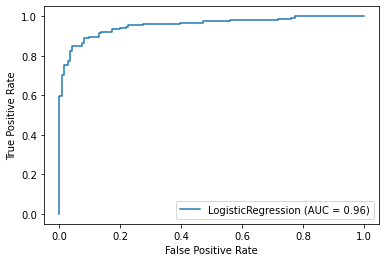

In [91]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(modelo, X_test, y_test) 

___
___
___

### E se tivermos uma classificação multiclasse?

Há problemas em que temos um problema de **classificação multiclasse**, pois há mais do que duas classes a serem preditas.

<img src="https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png">

Boa noitícia: o operacional de construção e avaliação do modelo com o sklearn muda em absolutamente **nada**.

No entanto, conceitualmente, há algumas mudanças: a rigor, o modelo passa a se chamar **regresão logística MULTINOMIAL**, cujo processo de classificação é dado pela função **softmax**:

<img src="https://i.stack.imgur.com/YLeRi.png" width=600>

Para quem quiser saber mais sobre o "logit score", [clique aqui](https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun).

Essencialmente, esse é o valor do termo linear usado como argumento da sigmoide, isto é, $z(x) = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p$

In [96]:
1/3

0.3333333333333333